In [202]:
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset
We import the libraries we will use. We also import our dataset with the pandas library.

In [203]:
df = pd.read_csv('/kaggle/input/spotify-1million-tracks/spotify_data.csv')

# Exploratory data analysis(EDA)

Columns of the data set, first 5 rows, data types, size of the data (1159764 rows, 20 columns), descriptive statistics (takes the distribution and central tendency of the data set)

In [204]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [205]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [207]:
df.shape

(1159764, 20)

In [208]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


Plotting histogram for all the columns/features of data

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

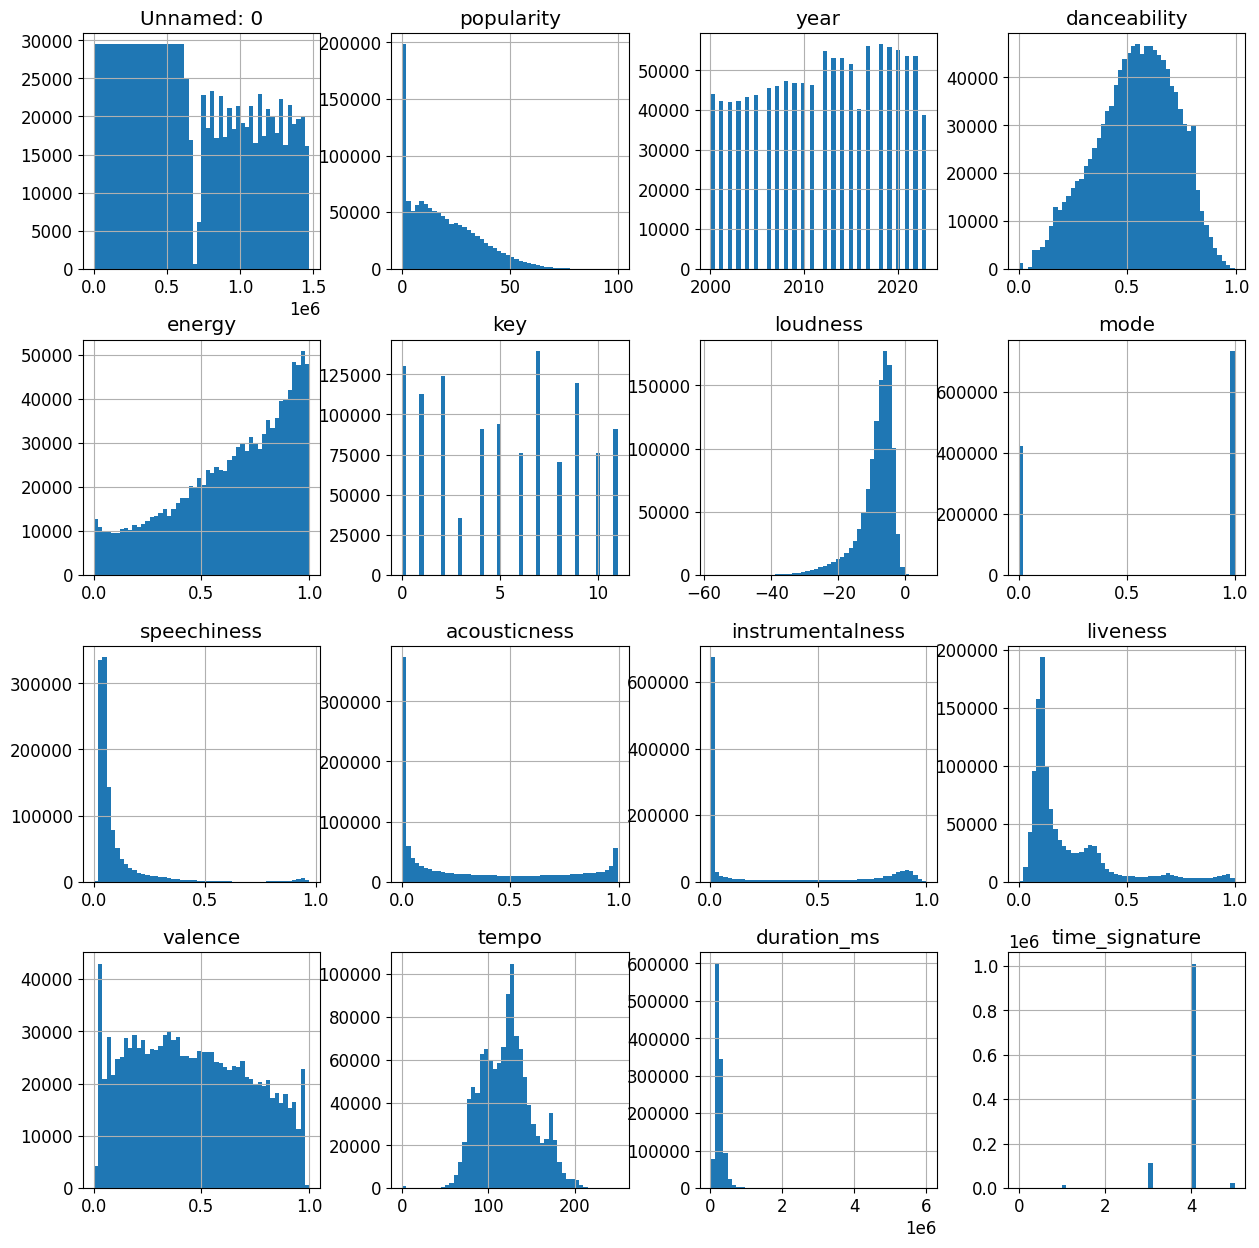

In [209]:
df.hist(bins=50,figsize=(15,15))

In [210]:
#Total number of unique values in column 'artist name'
unique_artists = df['artist_name'].nunique()
print('Number of unique artists:', unique_artists)

Number of unique artists: 64158


In [211]:
#Average popularity
avarage_popularity = df['popularity'].mean()
print('Average popularity:',avarage_popularity)

Average popularity: 18.38312277325387


In [212]:
#Most popular track and artist name
max_popularity = df['popularity'].max()
max_popularity_track = df[df['popularity'] == max_popularity][['track_name', 'artist_name']]
print("Max popularity track:")
print(max_popularity_track)

Max popularity track:
       track_name  artist_name
612503    Flowers  Miley Cyrus


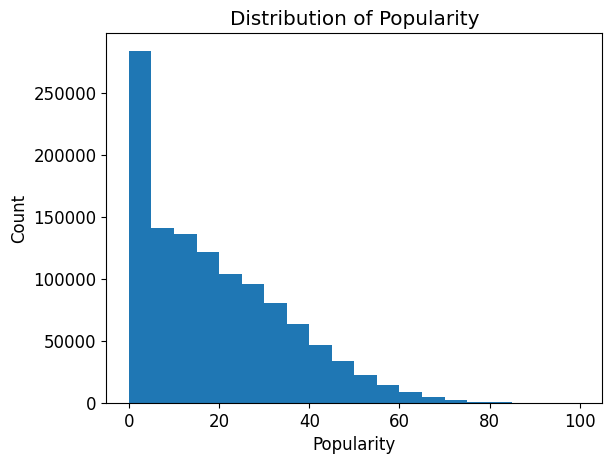

In [213]:
#Distribution of Popularity
plt.hist(df['popularity'],bins=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

In [214]:
#creating a new dataframe with features with numeric values

attributes=df[['popularity','year','danceability','energy','key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',]]

In [215]:
#correlation of all the features
corr_matrix = attributes.corr()

corr_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.345821
loudness            0.104097
danceability        0.098533
time_signature      0.030830
energy              0.009401
tempo               0.002566
key                 0.000390
valence            -0.018070
mode               -0.023837
speechiness        -0.024700
liveness           -0.056968
acousticness       -0.059181
instrumentalness   -0.152893
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

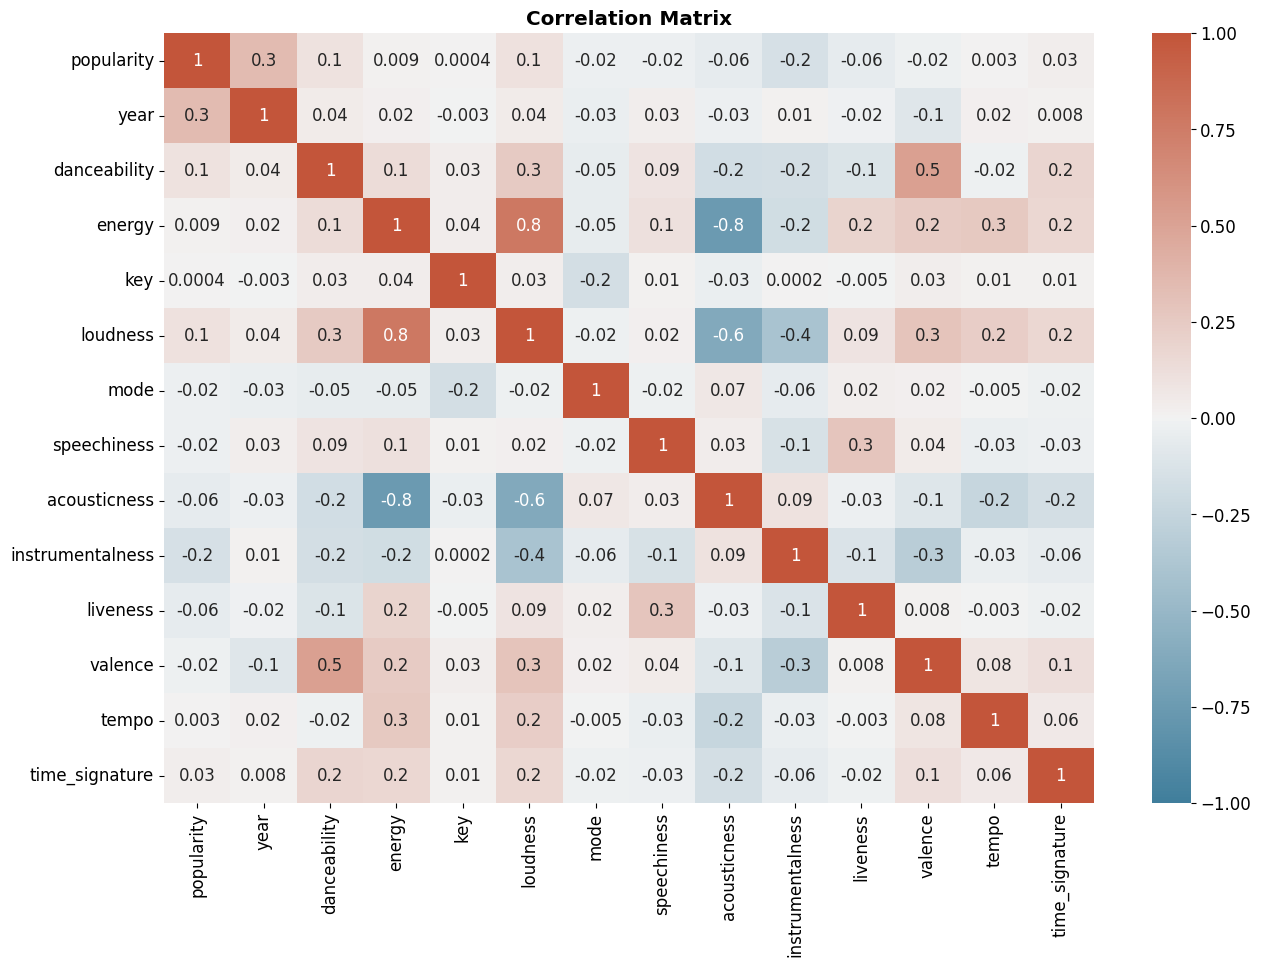

In [216]:
#plotting correlation heatmap using seaborn
import seaborn as sns
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(attributes.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [217]:
#identifying highly correlated pairs
corr_matrix = attributes.corr()
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)


negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 danceability  valence         0.519900
energy        loudness        0.781006
loudness      energy          0.781006
valence       danceability    0.519900
dtype: float64

Less Correlated Pairs: 
 energy        acousticness   -0.752662
loudness      acousticness   -0.621698
acousticness  energy         -0.752662
              loudness       -0.621698
dtype: float64


# Data Preprocessing

In [218]:
#setting ratings based on popularity score - popularity score 0 - 50 = Low, score = 51 - 100 = Popular
popularity_verdict = df.copy()
popularity_verdict['verdict'] = ''

for i, row in popularity_verdict.iterrows():
    score = 'low'
    if row.popularity >= 50:
        score = 'popular'
    popularity_verdict.at[i, 'verdict'] = score

In [219]:
#getting sense of new dataframe by looking at few columns
popularity_verdict[['artist_name','track_name','popularity','verdict']].head()

,artist_name,track_name,popularity,verdict
0,Jason Mraz,I Won't Give Up,68,popular
1,Jason Mraz,93 Million Miles,50,popular
2,Joshua Hyslop,Do Not Let Me Go,57,popular
3,Boyce Avenue,Fast Car,58,popular
4,Andrew Belle,Sky's Still Blue,54,popular


In [220]:
#counting popularity score values
popularity_verdict[['popularity']].value_counts()

popularity
0             158391
1              39820
2              31247
8              30322
9              29249
               ...  
93                 3
94                 1
95                 1
96                 1
100                1
Name: count, Length: 98, dtype: int64

In [221]:
#printing percentage of songs with 0 popularity score
print('Percent of data with a popularity of 0: {0:.2f}%'.format\
      (len(popularity_verdict[popularity_verdict.popularity == 0]) / len(popularity_verdict) * 100))

Percent of data with a popularity of 0: 13.66%


In [222]:
#last 5 records
popularity_verdict.tail()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,verdict
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,...,0,0.0736,0.325,0.000141,0.1590,0.5220,107.951,344013,3,low
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,...,0,0.0326,0.788,0.000129,0.1300,0.2640,119.897,285067,4,low
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,...,1,0.0274,0.477,0.003130,0.0936,0.0351,100.076,214253,4,low
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,...,1,0.0276,0.431,0.000063,0.1250,0.2020,133.885,239133,3,low
1159763,1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.782,0.861,1,...,0,0.1250,0.220,0.000008,0.0581,0.8570,89.987,212227,4,low


In [223]:
popularity_verdict.shape

(1159764, 21)

In [224]:
#as almost 15% of entries have 0 popularity score, we drop the records with 0 popularity score as this will help
#model in predicting better. 0 value records will not have significance in our analysis.
popularity_verdict = popularity_verdict[popularity_verdict.popularity > 0]

#last 5 records with popularity score = 1, hence records with popularity score = 0 are dropped
popularity_verdict.tail()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,verdict
1159758,1473390,Nicola Conte,Mystery of You,2Ktc7RQiZrqtjd0Gd4Gs61,7,2011,trip-hop,0.551,0.728,9,...,0,0.0355,0.468,0.000013,0.1180,0.4670,89.969,261733,4,low
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,...,0,0.0736,0.325,0.000141,0.1590,0.5220,107.951,344013,3,low
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,...,0,0.0326,0.788,0.000129,0.1300,0.2640,119.897,285067,4,low
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,...,1,0.0274,0.477,0.003130,0.0936,0.0351,100.076,214253,4,low
1159763,1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.782,0.861,1,...,0,0.1250,0.220,0.000008,0.0581,0.8570,89.987,212227,4,low


In [225]:
#Those with a popularity value of 0 were removed from the data set.
popularity_verdict.shape

(1001373, 21)

Text(0.5, 1.0, 'Popularity Score Distribution')

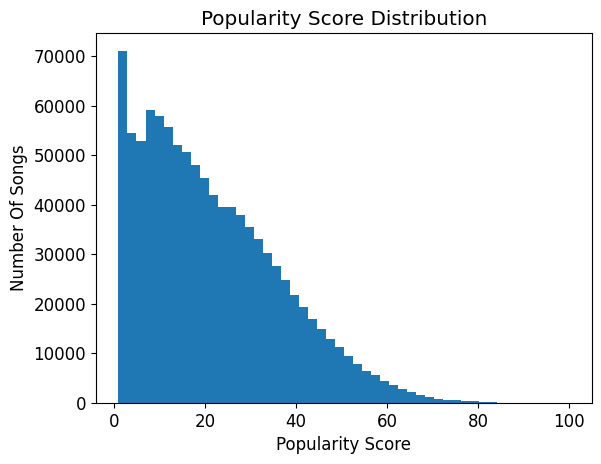

In [226]:
#plotting histogram for popularity score distribution
popularity_verdict['popularity'].plot(kind='hist',bins=50)
plt.xlabel('Popularity Score')
plt.ylabel('Number Of Songs')
plt.title('Popularity Score Distribution')

In [227]:
#We define the X and y variables for our analysis
pop_ver_att = popularity_verdict[['year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',]]

In [228]:
#X feature variables(numeric)
#y target variable is popularity
X = pop_ver_att.select_dtypes(include='number')
y = popularity_verdict['verdict']

In [229]:
X.shape

(1001373, 13)

In [230]:
X.head()

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2012,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3
1,2012,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4
2,2012,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4
3,2012,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4
4,2012,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4


In [231]:
y.head()

0    popular
1    popular
2    popular
3    popular
4    popular
Name: verdict, dtype: object

In [232]:
y.shape

(1001373,)

In [233]:
y.value_counts()

verdict
low        948383
popular     52990
Name: count, dtype: int64

# Model Training,Feature Scaling,Predictions

In [234]:
#Using scikit learn library for machine learning
#Feature scaling-StandardScaler
#Train-test set %20
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.2,shuffle=True)

In [235]:
#Logistic Regression
from sklearn import datasets, linear_model, metrics
log_reg = linear_model.LogisticRegression(solver = 'lbfgs',max_iter= 1000)

#train the model using training set
log_reg.fit(X_train,y_train)

#making predictions on the testing set
y_pred = log_reg.predict(X_test)

#Accuracy of algorithm
print('Logistic Regression Model Accuracy %:',
metrics.accuracy_score(y_test,y_pred) * 100)


Logistic Regression Model Accuracy %: 94.71576582199475


# Model Evaluation
The evaluation phase of the model with metrics

Use the Confusion Matrix.


In [236]:
#importing confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[189691      0]
 [ 10583      1]]
              precision    recall  f1-score   support

         low       0.95      1.00      0.97    189691
     popular       1.00      0.00      0.00     10584

    accuracy                           0.95    200275
   macro avg       0.97      0.50      0.49    200275
weighted avg       0.95      0.95      0.92    200275



# Other Supervised Learning Models and Results

In [237]:
#KNN CLASSİFİER
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('KNN Model Accuracy %:',
      metrics.accuracy_score(y_test,pred)*100)


[[180488   9203]
 [  8859   1725]]
              precision    recall  f1-score   support

         low       0.95      0.95      0.95    189691
     popular       0.16      0.16      0.16     10584

    accuracy                           0.91    200275
   macro avg       0.56      0.56      0.56    200275
weighted avg       0.91      0.91      0.91    200275

KNN Model Accuracy %: 90.98140057421045


In [238]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train,y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest Model Accuracy %:',
      metrics.accuracy_score(y_test,y_pred)*100)

[[189559    132]
 [ 10423    161]]
              precision    recall  f1-score   support

         low       0.95      1.00      0.97    189691
     popular       0.55      0.02      0.03     10584

    accuracy                           0.95    200275
   macro avg       0.75      0.51      0.50    200275
weighted avg       0.93      0.95      0.92    200275

Random Forest Model Accuracy %: 94.72974659842717


In [239]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state=42,max_depth=2)
d_tree.fit(X_train,y_train)

y_pred = d_tree.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree Model Accuracy %:',
      metrics.accuracy_score(y_test,y_pred)*100)

[[189691      0]
 [ 10584      0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         low       0.95      1.00      0.97    189691
     popular       0.00      0.00      0.00     10584

    accuracy                           0.95    200275
   macro avg       0.47      0.50      0.49    200275
weighted avg       0.90      0.95      0.92    200275

Decision Tree Model Accuracy %: 94.71526650855074


In [ ]:
#The Random Forest model is the algorithm that best fits this dataset.

In [240]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train,y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest Model Accuracy %:',
      metrics.accuracy_score(y_test,y_pred)*100)

[[189554    137]
 [ 10415    169]]
              precision    recall  f1-score   support

         low       0.95      1.00      0.97    189691
     popular       0.55      0.02      0.03     10584

    accuracy                           0.95    200275
   macro avg       0.75      0.51      0.50    200275
weighted avg       0.93      0.95      0.92    200275

Random Forest Model Accuracy %: 94.73124453875921


Text(0, 0.5, 'Count')

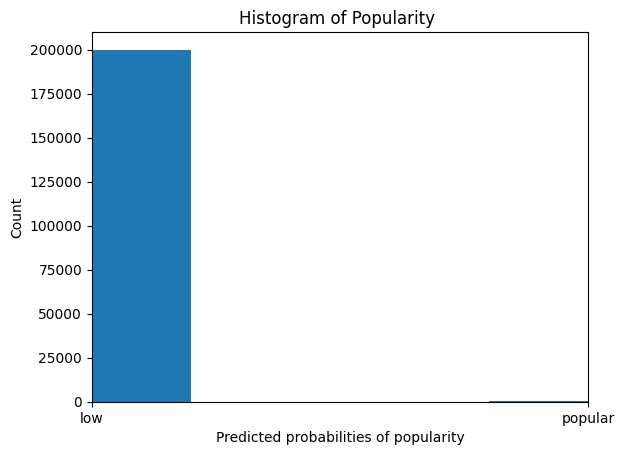

In [252]:
#plot histogram of predicted probabilities


#adjust the font size 
plt.rcParams['font.size'] = 10


#plot histogram with 5 bins
plt.hist(y_pred, bins = 5)


#set the title of predicted probabilities
plt.title('Histogram of Popularity ')


#set the x-axis limit
plt.xlim(0,1)


#set the title
plt.xlabel('Predicted probabilities of popularity')
plt.ylabel('Count')